PS: Classification using Deep neural network - Binary classification using Deep Neural Networks Example: Classify movie reviews into positive" reviews and "negative" reviews, just based on the text content of the reviews. Use IMDB dataset

In [ ]:
from tensorflow.keras.datasets import imdb
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# Vectorization
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# Model Building
model = Sequential()
model.add(Dense(16, input_shape=(10000,), activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Model Compiling
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model Training
history = model.fit(x_train, y_train, validation_split=0.3, epochs=20, batch_size=512)

# Model Evaluation
loss, accuracy = model.evaluate(x_test, y_test)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/20
35/35 [==============================] - 4s 69ms/step - loss: 0.0057 - accuracy: 0.9999 - val_loss: 0.7005 - val_accuracy: 0.8656
Epoch 2/20
35/35 [==============================] - 1s 31ms/step - loss: 0.0036 - accuracy: 0.9999 - val_loss: 0.7677 - val_accuracy: 0.8649
Epoch 3/20
35/35 [==============================] - 1s 29ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.7945 - val_accuracy: 0.8648
Epoch 4/20
35/35 [==============================] - 1s 29ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.8297 - val_accuracy: 0.8656
Epoch 5/20
35/35 [==============================] - 1s 35ms/step - loss: 9.8552e-04 - accuracy: 1.0000 - val_loss: 0.8569 - val_accuracy: 0.8639
Epoch 6/20
35/35 [==============================] - 2s 53ms/step - loss: 7.5815e-04 - accuracy: 1.0000 - val_loss: 0.8817 - val_accuracy: 0.8649
Epoch 7/20
35/35 [==============================] - 2s 51ms/step - loss: 6.0106e-04 - accuracy: 1.0000 - val_loss: 0.9038 - val_accuracy: 0.8648
E

In [ ]:
# Make predictions
predictions = model.predict(x_test)

# Convert predictions to binary
binary_predictions = np.round(predictions)

782/782 [==============================] - 4s 5ms/step


In [ ]:
# Calculate confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, binary_predictions)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[10726  1774]
 [ 2024 10476]]


In [ ]:
# Calculate metrics
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(y_test, binary_predictions))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.86      0.85     12500
         1.0       0.86      0.84      0.85     12500

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000



In [ ]:
# Plot ROC curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(fpr, tpr)

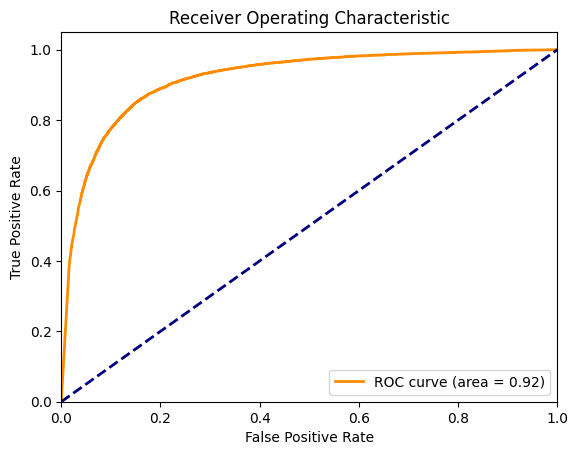

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Version 2 (Chatgpt)

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from tensorflow.keras.preprocessing import sequence

# Set parameters for data loading and model training
max_features = 5000  # Number of words to consider as features
maxlen = 100  # Cut texts after this number of words (among top max_features most common words)
batch_size = 32
epochs = 5

# Load the IMDB dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Pad sequences to ensure uniform length
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

# Build the model
model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

# Evaluate the model
score, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)


Epoch 1/5
782/782 [==============================] - 318s 399ms/step - loss: 0.4358 - accuracy: 0.7929 - val_loss: 0.3790 - val_accuracy: 0.8345
Epoch 2/5
782/782 [==============================] - 254s 325ms/step - loss: 0.3075 - accuracy: 0.8710 - val_loss: 0.3700 - val_accuracy: 0.8458
Epoch 3/5
782/782 [==============================] - 248s 317ms/step - loss: 0.2548 - accuracy: 0.8963 - val_loss: 0.3724 - val_accuracy: 0.8483
Epoch 4/5
782/782 [==============================] - 254s 325ms/step - loss: 0.2153 - accuracy: 0.9136 - val_loss: 0.3898 - val_accuracy: 0.8498
Epoch 5/5
782/782 [==============================] - 31s 40ms/step - loss: 0.4199 - accuracy: 0.8440
Test score: 0.4199430048465729
Test accuracy: 0.8440399765968323
